# 🏠 Prediksi Harga Rumah Boston: Bagging vs Boosting

Dataset: [Boston Housing](https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv)

## 🎯 Tujuan
Membandingkan performa model regresi:
- Random Forest (Bagging)
- Gradient Boosting (Boosting)

## 📏 Evaluasi
Model dievaluasi dengan:
- **MSE**: Mean Squared Error
- **RMSE**: Root Mean Squared Error
- **R²**: Koefisien Determinasi

## 🔢 Rumus Evaluasi

- **MSE** = $ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
- **RMSE** = $ \sqrt{\text{MSE}} $
- **R²** = $ 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $

## ✅ Kesimpulan
Model **Gradient Boosting Regressor** memiliki performa lebih baik:
- Error (MSE, RMSE) lebih kecil
- Skor R² lebih tinggi

> Maka, **Gradient Boosting** adalah pilihan terbaik untuk prediksi harga rumah di Boston.


=== 📊 Hasil Evaluasi Model Regressi Harga Rumah ===

🔹 Random Forest Regressor (Bagging)
---------------------------------------------
Mean Squared Error (MSE)  : 7.90
Root Mean Squared Error   : 2.81
Koefisien Determinasi R²  : 0.8923

🔸 Gradient Boosting Regressor (Boosting)
----------------------------------------------
Mean Squared Error (MSE)  : 6.21
Root Mean Squared Error   : 2.49
Koefisien Determinasi R²  : 0.9153

✅ Kesimpulan:
Model Gradient Boosting menunjukkan performa terbaik:
- Memiliki nilai MSE dan RMSE yang lebih rendah → prediksi lebih presisi
- Memiliki nilai R² yang lebih tinggi (0.9153) → lebih mampu menjelaskan variasi data

👉 Maka, **Gradient Boosting Regressor** adalah model terbaik untuk kasus ini.


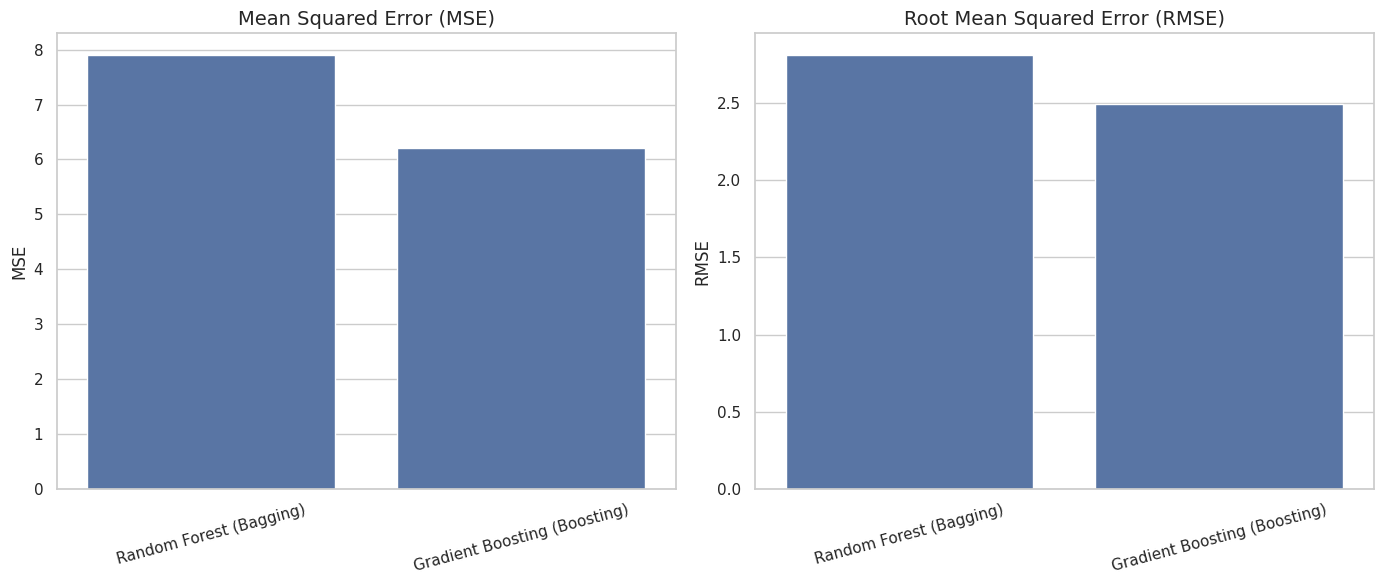

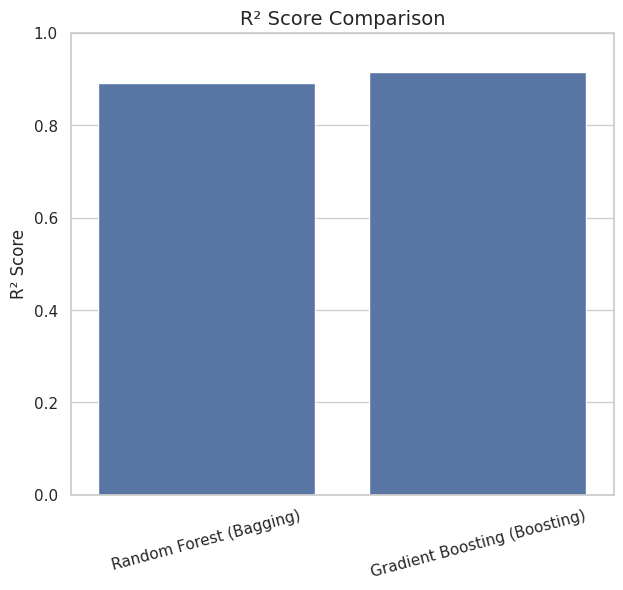

In [1]:
# ==========================================
# 🏡 Prediksi Harga Rumah - Bagging & Boosting
# ==========================================

# 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(url)

# 3. Cek Data
# print(df.head())
# print(df.info())

# 4. Split Fitur dan Target
X = df.drop(columns=['medv'])  # medv = median value of home
y = df['medv']

# 5. Split Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Inisialisasi dan Latih Model
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# 7. Prediksi
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# 8. Evaluasi Model
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

rf_mse, rf_rmse, rf_r2 = regression_metrics(y_test, rf_pred)
gb_mse, gb_rmse, gb_r2 = regression_metrics(y_test, gb_pred)

# 9. Tampilkan Hasil Evaluasi
print("=== 📊 Hasil Evaluasi Model Regressi Harga Rumah ===\n")

print("🔹 Random Forest Regressor (Bagging)")
print("-" * 45)
print(f"Mean Squared Error (MSE)  : {rf_mse:,.2f}")
print(f"Root Mean Squared Error   : {rf_rmse:,.2f}")
print(f"Koefisien Determinasi R²  : {rf_r2:.4f}\n")

print("🔸 Gradient Boosting Regressor (Boosting)")
print("-" * 46)
print(f"Mean Squared Error (MSE)  : {gb_mse:,.2f}")
print(f"Root Mean Squared Error   : {gb_rmse:,.2f}")
print(f"Koefisien Determinasi R²  : {gb_r2:.4f}\n")

print("✅ Kesimpulan:")
print("Model Gradient Boosting menunjukkan performa terbaik:")
print("- Memiliki nilai MSE dan RMSE yang lebih rendah → prediksi lebih presisi")
print(f"- Memiliki nilai R² yang lebih tinggi ({gb_r2:.4f}) → lebih mampu menjelaskan variasi data")
print("\n👉 Maka, **Gradient Boosting Regressor** adalah model terbaik untuk kasus ini.")

# 10. Visualisasi Perbandingan Metrik
metrics_df = pd.DataFrame({
    'Model': ['Random Forest (Bagging)', 'Gradient Boosting (Boosting)'],
    'MSE': [rf_mse, gb_mse],
    'RMSE': [rf_rmse, gb_rmse],
    'R²': [rf_r2, gb_r2]
})

sns.set(style="whitegrid")

# Grafik MSE dan RMSE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Model', y='MSE', data=metrics_df, ax=ax[0])
ax[0].set_title("Mean Squared Error (MSE)", fontsize=14)
ax[0].set_ylabel("MSE")
ax[0].set_xlabel("")
ax[0].tick_params(axis='x', rotation=15)

sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=ax[1])
ax[1].set_title("Root Mean Squared Error (RMSE)", fontsize=14)
ax[1].set_ylabel("RMSE")
ax[1].set_xlabel("")
ax[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Grafik R² Score
plt.figure(figsize=(7, 6))
sns.barplot(x='Model', y='R²', data=metrics_df)
plt.title("R² Score Comparison", fontsize=14)
plt.ylabel("R² Score")
plt.xlabel("")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()
